<a href="https://colab.research.google.com/github/20B01A0570/Kannikanti-Gayathri-Machine-Learning-Intern-YBI/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###YBI FOUNDATION 'MACHINE LEARNING INTERN'
**Author**: Kannikanti Gayathri<br>
**Batch**: 1st August<br>
**Project 5: Diabetes Prediction**<br>
Dataset Link: https://github.com/ybifoundation/Dataset/raw/main/Diabetes.csv

#Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

#Reading Data From Dataset

In [2]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Diabetes.csv')

In [3]:
df.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')

In [4]:
df.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

pregnancies    0
glucose        0
diastolic      0
triceps        0
insulin        0
bmi            0
dpf            0
age            0
diabetes       0
dtype: int64

In [8]:
def outlier_treatment():
    l = ["bmi","glucose","triceps","age","diastolic","insulin","pregnancies","dpf"]
    for i in l:
        x = np.quantile(df[i],[0.25,0.75])
        iqr = x[1]-x[0]
        uw = x[1]+1.5*iqr
        lw = x[0]-1.5*iqr
        df[i]  = np.where(df[i]>uw,uw,(np.where(df[i]<lw,lw,df[i])))
        
outlier_treatment()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

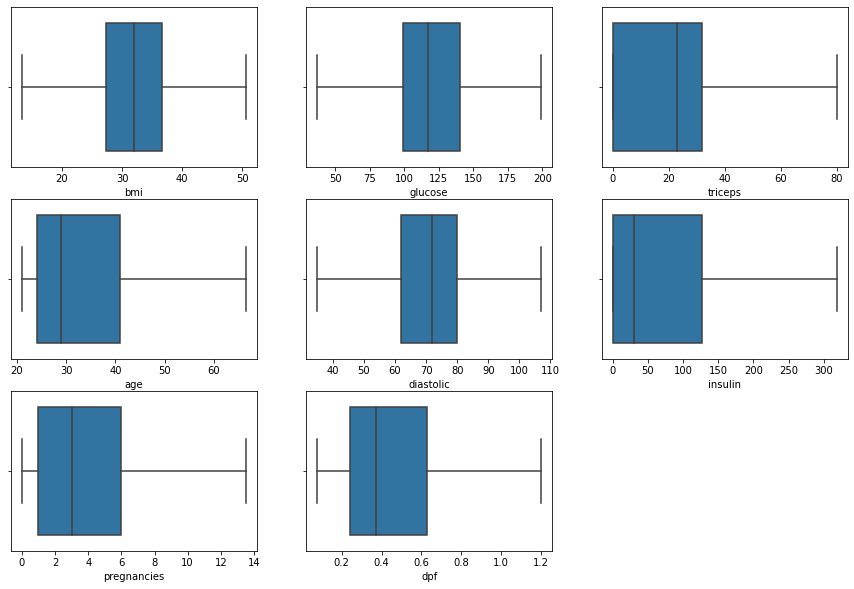

In [9]:
pno = 1
plt.figure(figsize=(15,10))
for i in ["bmi","glucose","triceps","age","diastolic","insulin","pregnancies","dpf"]:
        if pno<9:
            plt.subplot(3,3,pno)
            sns.boxplot(df[i]);
            plt.xlabel(i)
            pno+=1

#Pairplot of dataset

Text(0.5, 1.0, 'varibles relation with eachother and Diabetes')

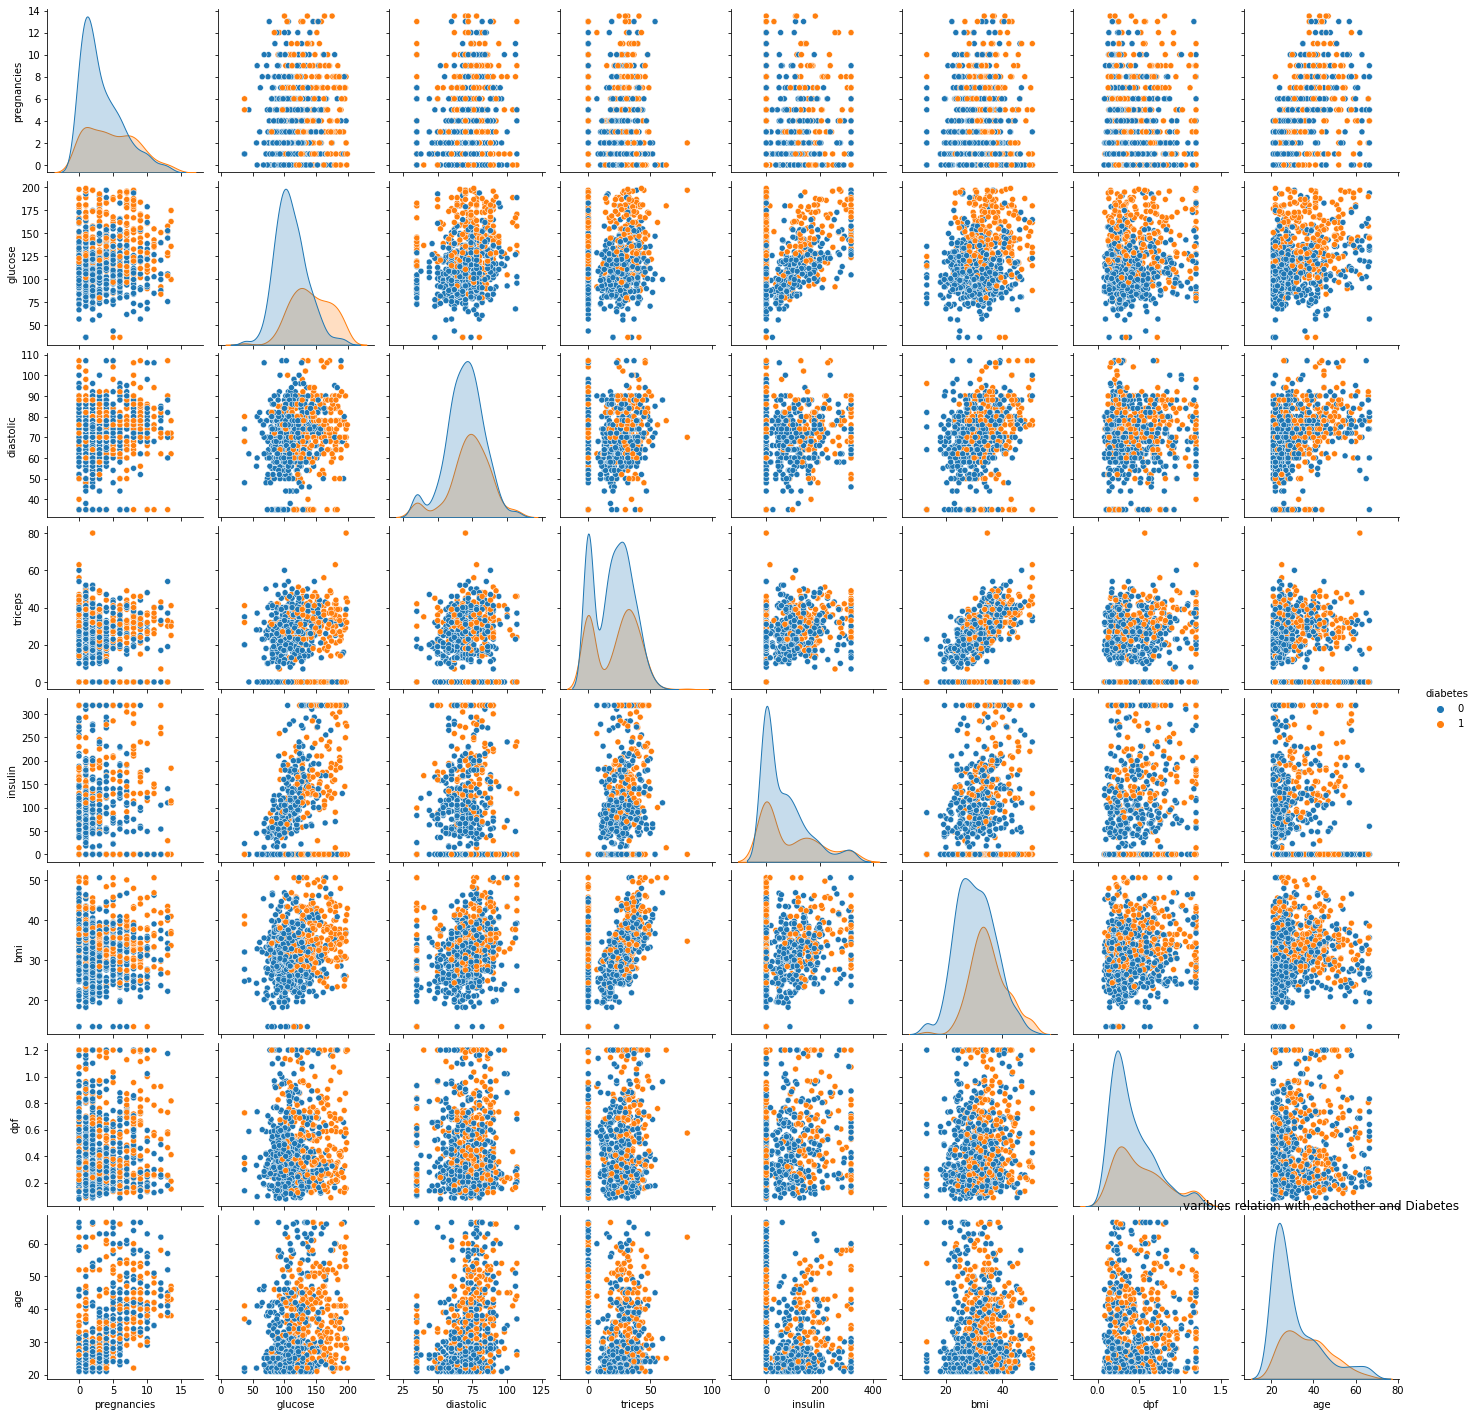

In [10]:
# variables relation with Outcome
sns.pairplot(df , hue = "diabetes" )
plt.title("varibles relation with eachother and Diabetes")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


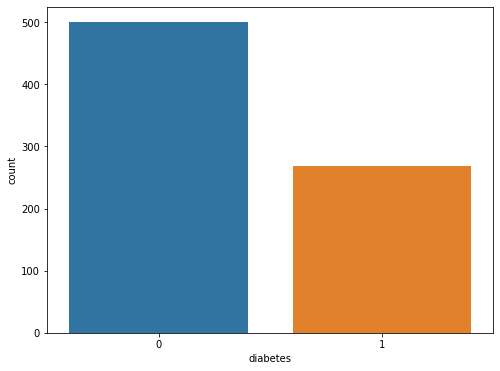

In [11]:
plt.figure(figsize=(8,6))
ax = sns.countplot("diabetes" , data = df)

#Defining X and y

In [12]:
X = df.drop(columns = ["diabetes"])       
y = df["diabetes"]  #target variable

In [13]:
#correlation among variables
df.corr()["diabetes"].sort_values(ascending = False)

diabetes       1.000000
glucose        0.479158
bmi            0.309739
age            0.242702
pregnancies    0.220392
dpf            0.184969
insulin        0.124721
diastolic      0.113301
triceps        0.073125
Name: diabetes, dtype: float64

#Heatmap of correlation

Text(0.5, 1.0, 'correlation of feature')

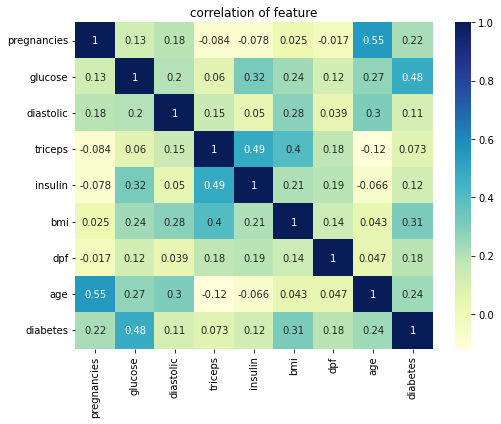

In [14]:
#Heatmap of correlation
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(),annot=True , cmap ='YlGnBu' )
plt.title("correlation of feature")

#Da

#Data Training and Testing

In [15]:
#Split Data into test and train sample
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,random_state = 2529)

#1.Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 200)

In [17]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=200)

In [18]:
y_pred = model.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix
accuracy_score(y_pred,y_test)

0.7705627705627706

#2.Random Forest

In [21]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
x_train = SS.fit_transform(x_train)
x_test = SS.fit_transform(x_test)


In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

#Random Forest Accuracy Score

In [23]:
pred_y = rf.predict(x_test)
score2=accuracy_score(y_test,pred_y)

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       169
           1       0.55      0.76      0.64        62

    accuracy                           0.77       231
   macro avg       0.72      0.76      0.73       231
weighted avg       0.80      0.77      0.78       231

Accuracy: 76.62%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


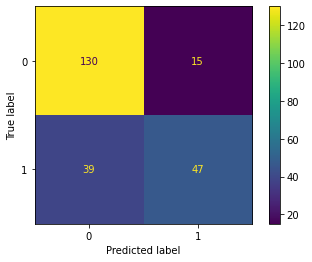

In [29]:
def report(model):
    preds=model.predict(x_test)
    print(classification_report(preds,y_test))
    plot_confusion_matrix(model,x_test,y_test)
print('Random Forest Classifier')
report(rf)
print(f'Accuracy: {round(score2*100,2)}%')